In [1]:
# Load our word2vec model
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("dataset/reviews_Musical_Instruments.d2v")
print("Model loaded")

Model loaded


In [10]:
print(w2v_model.wv.doesnt_match("i play guitar elephant".split()))

elephant


In [7]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in w2v_model.wv.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


/home/vineeth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [8]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [9]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [13]:
points.head(10)

,word,x,y
0,fawn,-2.857463,-17.360477
1,EXPLAIN,-19.926363,48.170261
2,woods,52.843014,-9.476622
3,clotted,-9.489252,-37.514702
4,spiders,35.858913,-8.259702
5,hanging,43.653191,-18.405724
6,woody,26.247522,-28.385931
7,trawling,5.587073,5.486302
8,comically,25.668663,-13.501925
9,Prong,-11.781030,4.744990


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

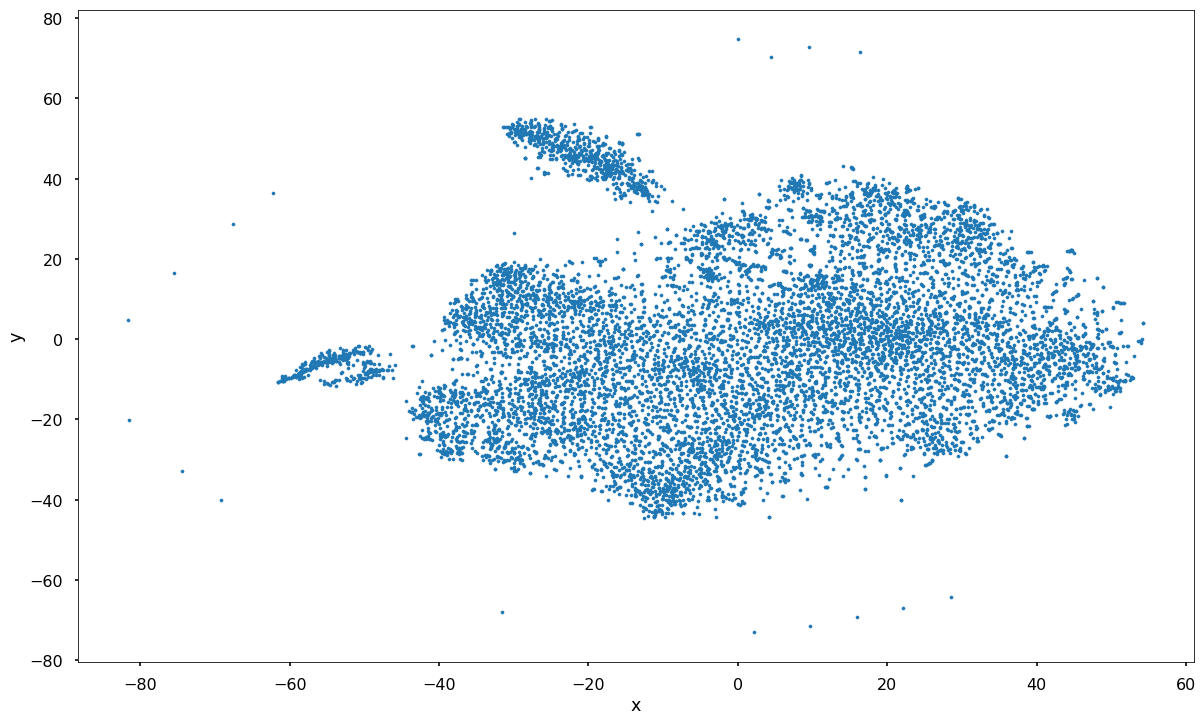

In [23]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [18]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [19]:
plot_region(x_bounds=(-2.2, -2.0), y_bounds=(-2.25, -2))

ValueError: scatter requires x column to be numeric

In [30]:
w2v_model.most_similar("country")

/home/vineeth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'southern', 0.6643918752670288),
 (u'blues', 0.6505380868911743),
 (u'gospel', 0.6388093829154968),
 (u'bluegrass', 0.6298505067825317),
 (u'folk', 0.6278625726699829),
 (u'rockabilly', 0.6255784034729004),
 (u'hillbilly', 0.6226277351379395),
 (u'skiffle', 0.6211134791374207),
 (u'western', 0.6092841625213623),
 (u'bubblegum', 0.6069154739379883)]